### Decision Tree

数学上如何使用信息论划分数据集

- 熵，为信息的期望值。而什么是信息？


- 信息，如果待分类的事务可能划分在多个分类之中，则符号$x_i$的信息定义为：${\color{red}{(放大信号,如下图)}}$
$$l(x_i)=-\log_2 p(x_i)$$   
其中$p(x_i)$是选择该分类的概率。



- 为了计算熵H，需要计算所有类别所有可能值包含的信息期望值：
$$H=-\sum_{i=1}^n\ p(x_i)\log_2 p(x_i)$$
其中n是分类的数目。

(-1, 10)

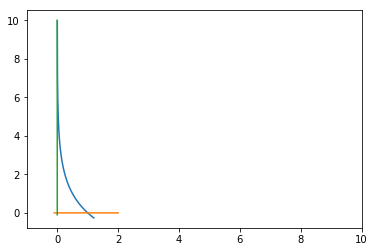

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

x=np.arange(0,1.2,0.001)
y=[-math.log(i,2) for i in x[1:]]
plt.plot(x[1:],y)
plt.plot(np.arange(-0.1,2,0.001),[0]*len(np.arange(-0.1,2,0.001)))
plt.plot([0]*len(np.arange(-0.1,10,0.001)),np.arange(-0.1,10,0.001))
plt.xlim(-1,10)

In [3]:
#计算信给定数据集的香农熵
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)    #统计数据集中样本总数
    labelCounts={}
    for featVec in dataSet:    #逐行循环数据集
        currentLabel=featVec[-1]   #每个样本即每行的最后一元素是该样本的类别标签，用作字典的键，统计出现频率
        if currentLabel not in labelCounts.keys():   #如果当前循环的类别标签第一次出现，即初始化该键值对的值为0
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1     #每次将当前循环中列表标签的统计频数加1
    shannonEnt=0   #最后返回的香农熵值初始化0，用于后面循环的累加操作
    for key in labelCounts:    #循环所有类别标签
        prob=labelCounts[key]/numEntries  #统计每个类别标签出现的概率
        shannonEnt-=prob*math.log(prob,2) #根据公式通过累加操作计算香农熵
    return shannonEnt

In [4]:
#创建简单数据集
def createDataSet():
    dataSet=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

In [5]:
myDat,labels=createDataSet()
print(myDat)
print(calcShannonEnt(myDat))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.9709505944546686


！！熵越高，则混合的数据也越多

In [6]:
#在数据集中添加更多的分类，观察熵的变化
#增加第三个名为maybe的分类
myDat[0][-1]='maybe'
print(myDat)
print(calcShannonEnt(myDat),'<- 看...高了吧')

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
1.3709505944546687 <- 看...高了吧


In [7]:
#按照给定特征划分数据集(抽取符合当前特征的当前取值的所有样本，返回列表已删除当前特征)
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]    #生成重组列表，删除当前循环中的特征
            reducedFeatVec.extend(featVec[axis+1:])    #添加参数列表的元素级别，可为操作列表的多元素添加
            retDataSet.append(reducedFeatVec)    #添加参数列表的整体作为操作列表的一个元素
    return retDataSet

In [8]:
#在简单样本数据上测试划分数据集函数splitDataSet()
myDat,labels=createDataSet()
print(myDat)
print(splitDataSet(myDat,0,1))
print(splitDataSet(myDat,0,0))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [9]:
#便利整个数据集，循环计算香农熵和splitDataSet()函数，找到最好的特征划分方式。
#熵计算将会告诉我们如何划分数据集是最好的数据组织方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1   #特征属性数量
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain=0
    bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]  #dataSet是列表，所以要一个个元素级别循环取当前特征值
        uniqueVals=set(featList)
        newEntropy=0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/len(dataSet)
            newEntropy+=prob*calcShannonEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        if(infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [10]:
#测试实际输出结果
myDat,labels=createDataSet()
chooseBestFeatureToSplit(myDat)

0

In [11]:
print(calcShannonEnt(splitDataSet(myDat,0,1)),'+',calcShannonEnt(splitDataSet(myDat,0,0)),'=',calcShannonEnt(splitDataSet(myDat,0,1))+calcShannonEnt(splitDataSet(myDat,0,0)))

0.9182958340544896 + 0.0 = 0.9182958340544896


In [12]:
print(calcShannonEnt(splitDataSet(myDat,1,1)),'+',calcShannonEnt(splitDataSet(myDat,1,0)),'=',calcShannonEnt(splitDataSet(myDat,1,1))+calcShannonEnt(splitDataSet(myDat,1,0)))

1.0 + 0.0 = 1.0


工作原理：
    
    得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分。第一次划分之后，数据将被向下传递到树分支的下一个节点，在这个节点上，可以再次划分数据。因此可以采用递归的原则处理数据集。
    
    递归结束的条件是：程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一个叶子节点或者终止块。任何到达叶子节点的数据必然属于叶子节点的分类。

In [16]:
import operator
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount=sorted(classCount.items(),key=operator.itimgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [45]:
def createTree(dataSet,labels):      #输入参数：数据集和标签列表
    classList=[example[-1] for example in dataSet]       #取数据集每行最后一元素，即各样本的类别标签
    if classList.count(classList[0])==len(classList):    #如果按类计数结果=类别标签列表长度，即当前数据集全部属于同一类别
        return classList[0]         #返回当前类别标签当做叶子节点
    if len(dataSet[0])==1:          #当特征都用完的时候
        return majorityCnt(classList)       #选出现次数最多的类别作为返回值
    bestFeat=chooseBestFeatureToSplit(dataSet)   #选最优的划分特征的索引位
    bestFeatLabel=labels[bestFeat]  #返回最佳标签
    myTree={bestFeatLabel:{}}       #当前标签作为字典的键
    del(labels[bestFeat])           #删除标签列表中的最佳划分特征
    featValues=[example[bestFeat] for example in dataSet]   #取出当前最佳划分特征的所有取值
    uniqueVals=set(featValues)      #当前最佳划分特征的取值去重
    for value in uniqueVals:        #逐个循环
        subLabels=labels[:]         #列表复制，不改变原列表
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)   #决策树当前划分特征的值键=下个循环返回的结果
    return myTree  #返回整个决策树

In [44]:
myDat,labels=createDataSet()
createTree(myDat,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [46]:
#递归函数的labels 改sublabels，运行与不改并没有区别？？为什么
myDat,labels=createDataSet()
createTree(myDat,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

绘制树形图 Matplotlib

In [137]:
#注解 annotation
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext=centerPt,textcoords='axes fraction',
                            va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)   #bbox=nodeType不写这个，节点没有框框
    
def createPlot():
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode(u'决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

In [110]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

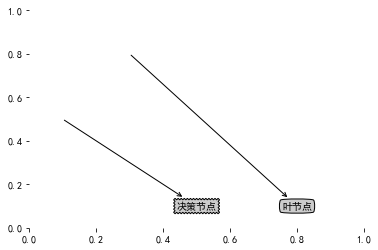

In [138]:
createPlot()

构造注解树

虽然有x、y坐标，但是如何放置所有的树节点却是个问题。必须知道有多少个节点，以确定x轴的长度；还需要知道树有多少层，以确定y轴高度。

这里定义两个新函数getNumLeafs()和getTreeDepth()，来获取叶节点的数目和树的层数。

In [165]:
#获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs=0    #初始化叶子节点计数
    firstStr=list(myTree.keys())[0]    #取当前树当前判断节点(字典)的键的第一个元素
    secondDict=myTree[firstStr]  #得到这个键对应的值，即当前判断节点的各分支总体情况
    for key in secondDict.keys(): #将各分支中的键逐个循环
        if type(secondDict[key]).__name__=='dict':   #如果分支中有字典类型，即判断节点
            numLeafs+=getNumLeafs(secondDict[key])   #进入该判断节点，递归查找该判断节点各分支节点的整体情况，直到遇见叶子节点计数加1后返回
        else: numLeafs+=1    #遇到叶子节点计数累加1
    return numLeafs    #返回叶子节点数

def getTreeDepth(myTree):   
    maxDepth=0    #初始化数的深度
    firstStr=list(myTree.keys())[0]   #树当前判断节点（字典）的键的第一个元素
    secondDict=myTree[firstStr] #得到当前判断节点的各分支总体情况
    for key in secondDict.keys():  #将各分支中的键逐个循环
        if type(secondDict[key]).__name__=='dict':  #如果是判断节点
            thisDepth=1+getTreeDepth(secondDict[key])  #计数1+后面判断节点个数：通过递归找分支中还有没有判断节点，直到没有再遇见判断节点即返回
        else: thisDepth=1
        if thisDepth>maxDepth:maxDepth=thisDepth
    return maxDepth    

In [143]:
#输出预先存储的树信息
def retrieveTree(i):
    listOfTrees=[{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},
                {'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}]
    return listOfTrees[i]

In [155]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [158]:
list(retrieveTree(1))

['no surfacing']

In [166]:
myTree=retrieveTree(0)
getNumLeafs(myTree)

3

In [164]:
getTreeDepth(myTree)

2

In [172]:
#plotTree函数
#更新之前的createPlot()的部分代码
def plotMidText(cntrPt,parentPt,txtString):
    xMid=(parentPt[0]-cntrPt[0])/2+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/2+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)
    
def plotTree(myTree,parentPt,nodeTxt):      #调用了plotMidText()
    numLeafs=getNumLeafs(myTree)            #
    depth=getTreeDepth(myTree)
    firstStr=list(myTree.keys())[0]
    cntrPt=(plotTree.xOff+(1+numLeafs)/2/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.yOff=plotTree.yOff-1/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff=plotTree.yOff=1/plotTree.totalD
    
def createPlot(inTree):          #主函数，调用了plotTree()绘制图形的大部分工作
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=getNumLeafs(inTree)
    plotTree.totalD=getTreeDepth(inTree)
    plotTree.xOff=-0.5/plotTree.totalW
    plotTree.yOff=1
    plotTree(inTree,(0.5,1),'')
    plt.show()

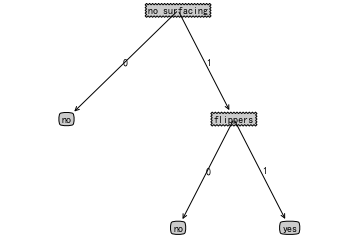

In [173]:
createPlot(myTree)

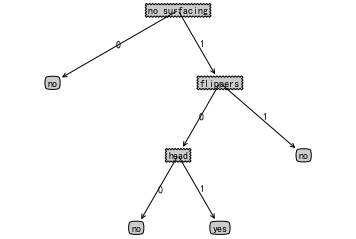

In [174]:
createPlot(retrieveTree(1))

'str'

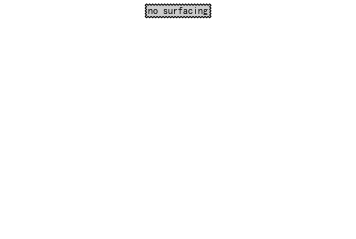

In [202]:
fig=plt.figure(1,facecolor='white')
fig.clf()
axprops=dict(xticks=[],yticks=[])
createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
plotTree.totalW=getNumLeafs(myTree)   #全局变量树宽度
plotTree.totalD=getTreeDepth(myTree)  #全局变量树深度
plotTree.xOff=-0.5/plotTree.totalW
plotTree.yOff=1

numLeafs=getNumLeafs(myTree)
depth=getTreeDepth(myTree)
firstStr=list(myTree.keys())[0]
cntrPt=(plotTree.xOff+(1+numLeafs)/2/plotTree.totalW,plotTree.yOff)

plotMidText(cntrPt,(0.5,1),'')
plotNode(firstStr,cntrPt,(0.5,1),decisionNode)
secondDict=myTree[firstStr]
plotTree.yOff=plotTree.yOff-1/plotTree.totalD

type(secondDict[0]).__name__

In [200]:
secondDict.keys()

dict_keys([0, 1])

In [199]:
plotTree.yOff

0.5

In [191]:
cntrPt

(0.5, 1)

In [189]:
firstStr

'no surfacing'

In [187]:
depth

2

In [186]:
numLeafs

3

In [179]:
plotTree.totalW

3

In [180]:
plotTree.totalD

2

In [182]:
#-1/6
plotTree.xOff

-0.16666666666666666

In [ ]:
plotTree.yOff=1